# ***Spotify Songs Exploratory Data Analysis (2015–2025)***
***In this project, I performed exploratory data analysis (EDA) on a Spotify songs dataset containing around 85,000 tracks released between 2015 and 2025.  
The purpose of this analysis is to understand the structure of the data, identify trends over time, and explore factors related to song popularity.***

## ***Importing Required Libraries***
***In this step, I am importing the Python libraries required for data handling, numerical operations, and data visualization.***


In [9]:
# Core data handling libraries
import pandas as pd        # For data manipulation (tables, columns, rows)
import numpy as np         # For numerical operations

# Data visualization libraries
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns            # Advanced & prettier plots

# Ignore unnecessary warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load the Spotify dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\spotify_2015_2025_85k.csv")

## ***Loading the Dataset***
***The Spotify dataset is loaded using pandas. After loading the data, I check the first few rows to understand the structure and available columns.***


In [11]:
# Display first 5 rows of the dataset
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


## ***Basic Dataset Overview***
***Before performing analysis, I checked the size of the dataset, column names, data types, and missing values to understand the overall quality of the data.***

In [12]:
# Check number of rows and columns
df.shape

(85000, 19)

In [13]:
# Display all column names
df.columns

Index(['track_id', 'track_name', 'artist_name', 'album_name', 'release_date',
       'genre', 'duration_ms', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'instrumentalness', 'tempo', 'stream_count',
       'country', 'explicit', 'label'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000 non-null  object

In [15]:
# Check missing values count per column
df.isnull().sum()

track_id             0
track_name          21
artist_name          0
album_name          46
release_date         0
genre                0
duration_ms          0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
instrumentalness     0
tempo                0
stream_count         0
country              0
explicit             0
label                0
dtype: int64

## ***Handling Missing Values***
***A small number of missing values were found in text-based columns such as track name and album name.  
Since these missing values were very few compared to the total dataset size, the affected rows were removed.***

In [16]:
# Drop rows where track_name or album_name is missing
df = df.dropna(subset=['track_name', 'album_name'])

In [17]:
# Check shape after dropping missing values
df.shape

(84933, 19)

## ***Date Processing***
***The release date column is converted into datetime format to allow time-based analysis.  
A new column for release year is then created to analyze trends across years.***

In [18]:
# Convert release_date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [19]:
# Check data type after conversion
df['release_date'].dtype

dtype('<M8[ns]')

In [20]:
# Check first few values of release_year
df['release_year'] = df['release_date'].dt.year

In [21]:
# Check first few values of release_date and release_year
df[['release_date', 'release_year']].head()

,release_date,release_year
0,2016-04-01,2016
1,2022-04-15,2022
2,2016-02-23,2016
3,2015-10-12,2015
4,2022-07-08,2022


In [22]:
# Check minimum and maximum release year
df['release_year'].min(), df['release_year'].max()

(2015, 2025)

In [23]:
# Count number of songs released per year
songs_per_year = df['release_year'].value_counts().sort_index()
songs_per_year

release_year
2015    7931
2016    7650
2017    7669
2018    7836
2019    7667
2020    7797
2021    7463
2022    7730
2023    7794
2024    7690
2025    7706
Name: count, dtype: int64

## ***Year-wise Song Release Trend***
***In this section, I analyzed how the number of songs released on Spotify has changed over the years from 2015 to 2025.  
This helps in understanding overall release patterns and identifying any noticeable increase or decline in specific years.***

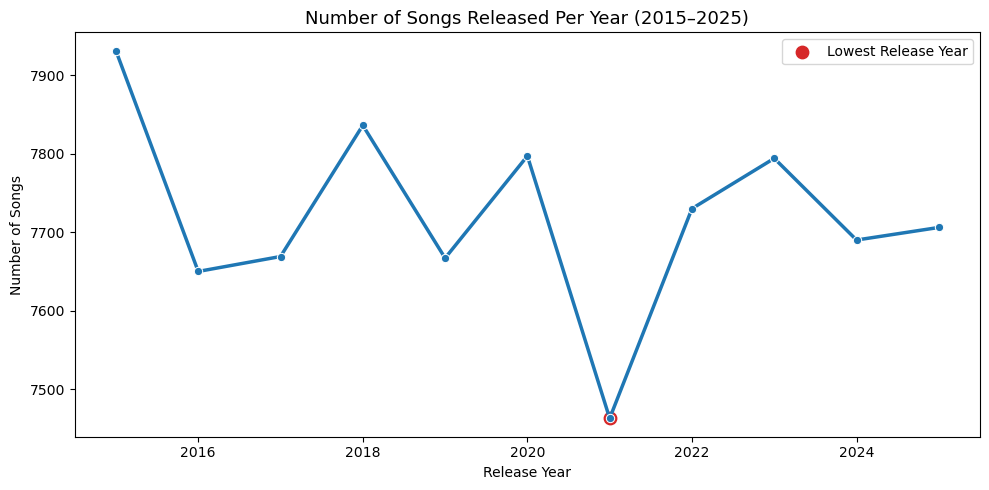

In [24]:
# Set plot style and size
plt.figure(figsize=(10, 5))

# Create line plot with improved styling
sns.lineplot(
    x=songs_per_year.index,
    y=songs_per_year.values,
    marker='o',              # shows points clearly
    linewidth=2.5,
    color='#1F77B4'           # professional blue
)

# Highlight the lowest year (dip)
plt.scatter(
    songs_per_year.idxmin(),
    songs_per_year.min(),
    color='#D62728',          # red highlight
    s=80,
    label='Lowest Release Year'
)

# Add titles and labels
plt.title("Number of Songs Released Per Year (2015–2025)", fontsize=13)
plt.xlabel("Release Year")
plt.ylabel("Number of Songs")

plt.legend()
plt.tight_layout()
plt.show()

### ***Observation***
***From the above chart, it can be seen that the number of songs released each year remains fairly consistent between 2015 and 2025.  
There is a noticeable drop around 2021, followed by a recovery in the subsequent years, indicating a temporary decline in song releases during that period.***

## ***Average Song Popularity Over Time***
***In this section, I analyzed how the average popularity of songs has changed over the years.  
This helps in understanding whether newer songs are generally becoming more or less popular over time.***

In [28]:
# Calculate average popularity per year
avg_popularity_per_year = (
    df.groupby('release_year')['popularity']
    .mean()
    .round(2)
)
avg_popularity_per_year

release_year
2015    48.23
2016    47.99
2017    48.00
2018    48.08
2019    47.95
2020    48.22
2021    48.44
2022    48.14
2023    48.29
2024    48.23
2025    48.22
Name: popularity, dtype: float64

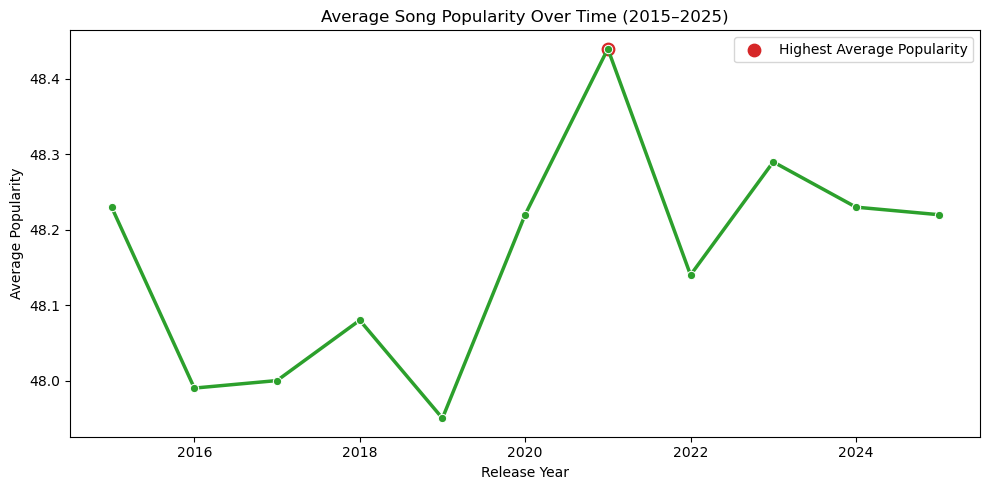

In [29]:
# Set plot size
plt.figure(figsize=(10, 5))

sns.lineplot(
    x=avg_popularity_per_year.index,
    y=avg_popularity_per_year.values,
    marker='o',
    linewidth=2.5,
    color='#2CA02C'
)

plt.scatter(
    avg_popularity_per_year.idxmax(),
    avg_popularity_per_year.max(),
    color='#D62728',
    s=80,
    label='Highest Average Popularity'
)

plt.title("Average Song Popularity Over Time (2015–2025)")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")

plt.legend()
plt.tight_layout()
plt.show()

### ***Observation***
***From the chart above, the average popularity of songs remains fairly stable across the years.  
Although there are minor fluctuations, there is no strong upward or downward trend in popularity over time.***

## ***Genre-wise Popularity Analysis***
***In this section, I analyzed the average popularity of songs across different genres.  
The aim is to understand whether certain genres tend to perform better in terms of popularity compared to others.***

In [31]:
# Calculate average popularity per genre
genre_popularity = (
    df.groupby('genre')['popularity']
    .mean()
    .sort_values(ascending=False)
)
# Display top 10 genres by popularity
genre_popularity.head(10)

genre
Pop          48.378157
R&B          48.368555
Classical    48.366839
Hip-Hop      48.357932
EDM          48.208775
Metal        48.191608
Country      48.169586
Indie        48.124339
Folk         48.099195
Rock         47.964125
Name: popularity, dtype: float64

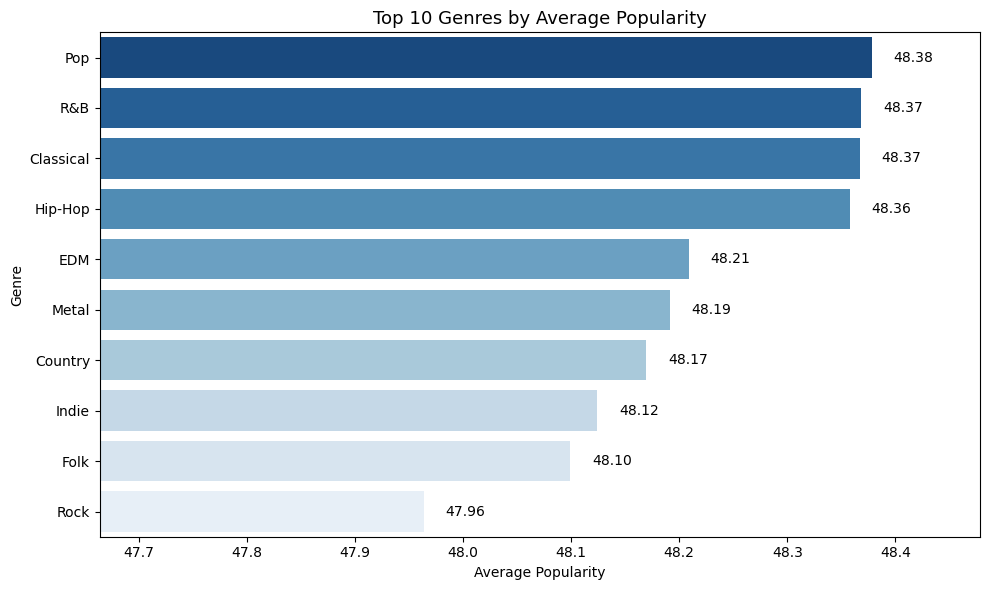

In [33]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create bar plot with gradient colors
sns.barplot(
    x=genre_popularity.head(10).values,
    y=genre_popularity.head(10).index,
    palette='Blues_r'
)

# Zoom x-axis to highlight small differences
min_val = genre_popularity.head(10).values.min()
max_val = genre_popularity.head(10).values.max()
plt.xlim(min_val - 0.3, max_val + 0.1)

# Add value labels
for index, value in enumerate(genre_popularity.head(10).values):
    plt.text(value + 0.02, index, f"{value:.2f}", va='center')

# Add titles and labels
plt.title("Top 10 Genres by Average Popularity", fontsize=13)
plt.xlabel("Average Popularity")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

### ***Observation & Note***
***From the chart above, the average popularity values across the top genres are very close to each other, with only minor differences in ranking.  
To make these small differences easier to see, the x-axis has been zoomed so that the variations between genres are more clearly visible.  
Overall, this suggests that genre alone does not strongly determine a song’s popularity on Spotify.***

## ***Popularity Distribution Across Genres***
***In this section, I analyzed how song popularity is distributed across the most common genres.  
Instead of looking only at average popularity, this visualization helps in understanding the spread, median, and presence of outliers within each genre.***

In [35]:
# Select top 8 genres by song count for better visualization
top_genres = df['genre'].value_counts().head(8).index

# Filter data for those genres
df_top_genres = df[df['genre'].isin(top_genres)]

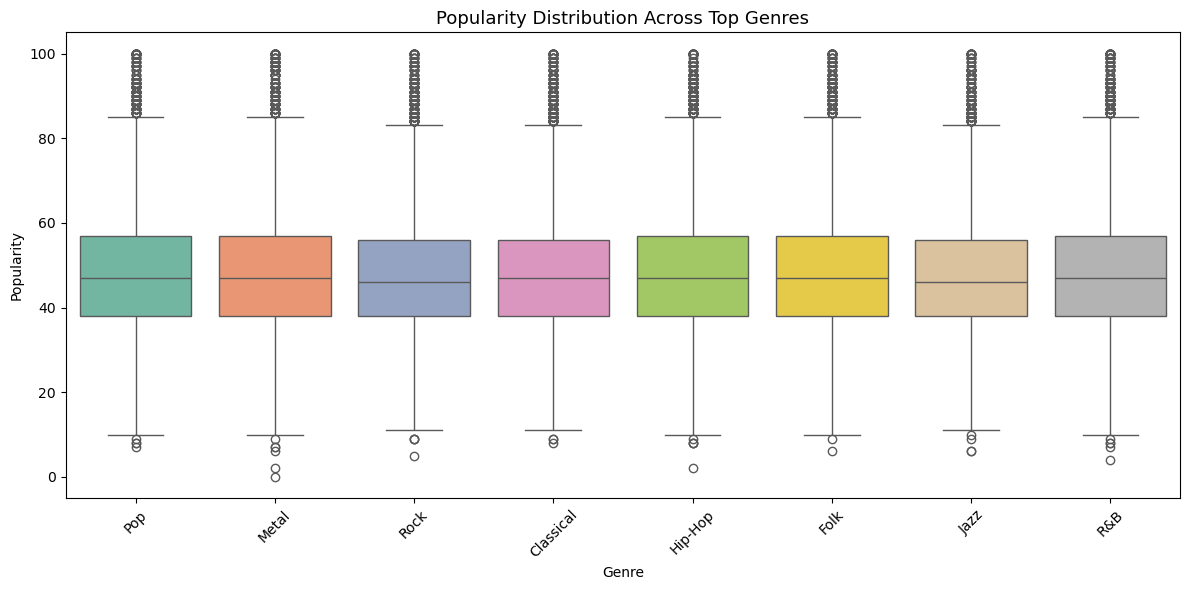

In [40]:
# Set plot size
plt.figure(figsize=(12, 6))

# Create boxplot 
sns.boxplot(
    data=df_top_genres,
    x='genre',
    y='popularity',
    palette='Set2'   # soft, distinct colors
)
# Add titles and labels
plt.title("Popularity Distribution Across Top Genres", fontsize=13)
plt.xlabel("Genre")
plt.ylabel("Popularity")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### ***Observation***
***The popularity distribution across the top genres is largely similar, with comparable medians and ranges.  
Each genre contains a few high-popularity outliers, indicating that hit songs exist across all genres rather than being concentrated in a single one.***

## ***Relationship Between Stream Count and Popularity***
***In this section, I explored the relationship between the number of streams a song has and its popularity score.  
This helps in understanding whether higher streaming numbers are associated with higher popularity.***

In [42]:
# Create popularity bands based on popularity values
df['popularity_band'] = pd.qcut(
    df['popularity'],
    q=3,
    labels=['Low', 'Average', 'Hit']
)

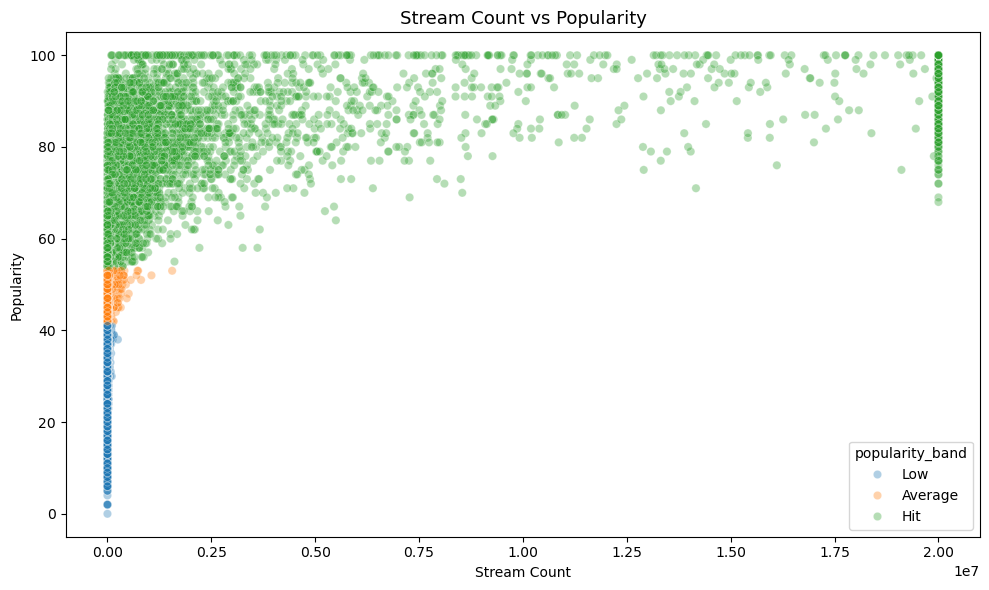

In [43]:
# Scatter plot: Stream count vs Popularity (with color differentiation)
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='stream_count',
    y='popularity',
    hue='popularity_band',           # meaningful color split
    palette={
        'Low': '#1F77B4',             # blue
        'Average': '#FF7F0E',         # orange
        'Hit': '#2CA02C'              # green
    },
    alpha=0.35
)
plt.title("Stream Count vs Popularity", fontsize=13)
plt.xlabel("Stream Count")
plt.ylabel("Popularity")

plt.tight_layout()
plt.show()

### ***Observation***
***From the scatter plot above, songs with higher stream counts generally tend to have higher popularity scores.  
Low-popularity songs are mostly concentrated at lower stream counts, while highly popular songs appear more frequently at higher stream levels.***

## ***Correlation Analysis of Audio Features***
***In this section, I analyzed the correlation between song popularity and various audio features such as danceability, energy, loudness, tempo, and stream count.  
This helps in understanding whether any of these features have a strong linear relationship with popularity.***

In [44]:
# Select numeric columns for correlation
numeric_cols = [
    'popularity', 'danceability', 'energy', 'loudness',
    'instrumentalness', 'tempo', 'stream_count'
]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

corr_matrix

,popularity,danceability,energy,loudness,instrumentalness,tempo,stream_count
popularity,1.000000,0.003204,-0.000308,0.003205,0.002109,-0.002727,0.357597
danceability,0.003204,1.000000,-0.004088,0.002380,0.004563,-0.002506,0.000460
energy,-0.000308,-0.004088,1.000000,0.005641,0.002129,-0.006633,-0.001408
loudness,0.003205,0.002380,0.005641,1.000000,0.002341,-0.001070,-0.001616
instrumentalness,0.002109,0.004563,0.002129,0.002341,1.000000,-0.003902,-0.000893
tempo,-0.002727,-0.002506,-0.006633,-0.001070,-0.003902,1.000000,-0.001138
stream_count,0.357597,0.000460,-0.001408,-0.001616,-0.000893,-0.001138,1.000000


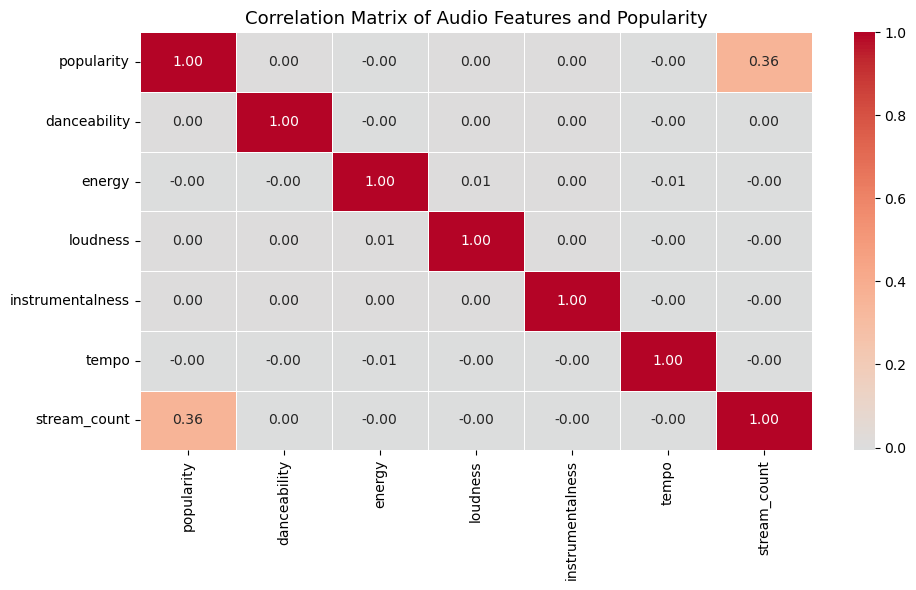

In [45]:
# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,        # makes positive/negative clearer
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix of Audio Features and Popularity", fontsize=13)
plt.tight_layout()
plt.show()

### ***Observation***
***From the correlation matrix, stream count shows a moderate positive correlation with popularity, while most audio features such as danceability, energy, tempo, and loudness have very weak or near-zero correlation.  
This suggests that song popularity on Spotify is more strongly influenced by listener engagement rather than individual audio characteristics.***


## ***Explicit vs Non-Explicit Songs Popularity***
***In this section, I compared the average popularity of explicit and non-explicit songs.  
The purpose of this analysis is to understand whether the presence of explicit content has a noticeable impact on song popularity.***

In [46]:
# Compare popularity between explicit and non-explicit songs
explicit_popularity = (
    df.groupby('explicit')['popularity']
    .mean()
    .round(2)
)
explicit_popularity

explicit
0    48.17
1    48.14
Name: popularity, dtype: float64

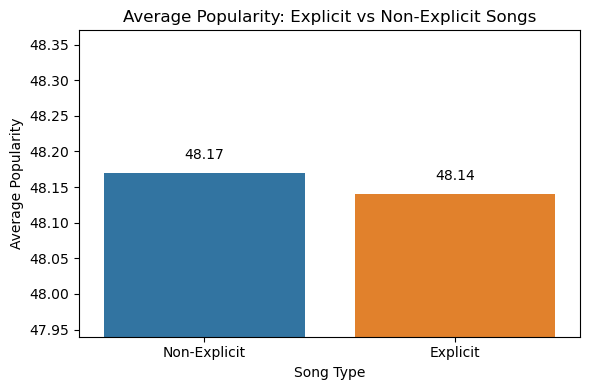

In [48]:
# Convert explicit values to readable labels
explicit_popularity.index = ['Non-Explicit', 'Explicit']

# Plot bar chart with improved styling
plt.figure(figsize=(6, 4))

sns.barplot(
    x=explicit_popularity.index,
    y=explicit_popularity.values,
    palette=['#1F77B4', '#FF7F0E']  # blue vs orange
)

# Zoom y-axis to highlight small difference
plt.ylim(
    explicit_popularity.min() - 0.2,
    explicit_popularity.max() + 0.2
)
# Add value labels
for index, value in enumerate(explicit_popularity.values):
    plt.text(index, value + 0.02, f"{value}", ha='center')

plt.title("Average Popularity: Explicit vs Non-Explicit Songs", fontsize=12)
plt.xlabel("Song Type")
plt.ylabel("Average Popularity")

plt.tight_layout()
plt.show()

### ***Observation***
***From the chart above, the average popularity of explicit and non-explicit songs is very similar, with only a minimal difference between them.  
This suggests that explicit content alone does not have a significant impact on a song’s popularity on Spotify.***

## ***Energy vs Danceability (Explicit vs Non-Explicit)***
***In this section, I analyzed the relationship between energy and danceability of songs, while also comparing explicit and non-explicit tracks.  
This helps in understanding whether lyrical explicitness has any visible impact on core audio characteristics.***

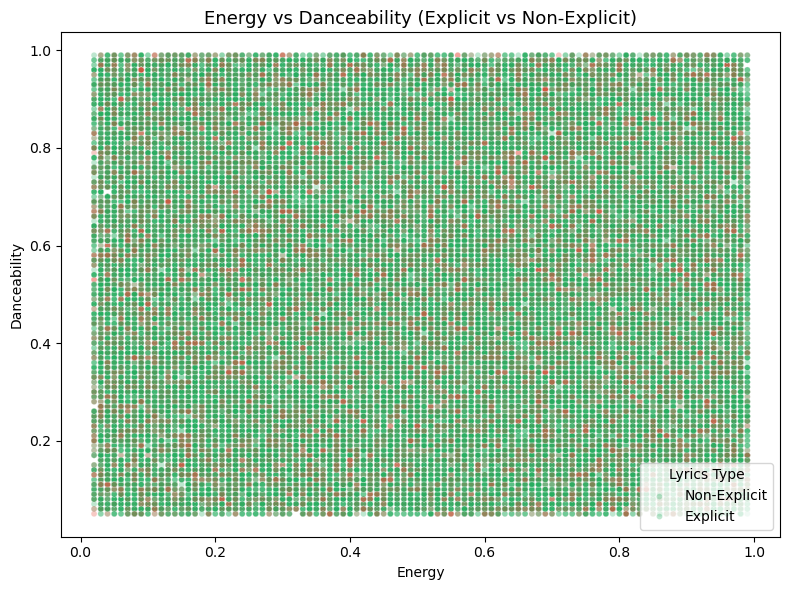

In [50]:
# Scatter plot: Energy vs Danceability (Explicit vs Non-Explicit)
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='energy',
    y='danceability',
    hue='explicit',
    palette={0: '#27AE60', 1: '#E74C3C'},  # Green: Non-Explicit, Red: Explicit
    alpha=0.3,
    s=18
)

plt.title("Energy vs Danceability (Explicit vs Non-Explicit)", fontsize=13)
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.legend(title="Lyrics Type", labels=["Non-Explicit", "Explicit"])

plt.tight_layout()
plt.show()

### ***Observation***
***From the scatter plot above, explicit and non-explicit songs show a very similar distribution across energy and danceability values.  
This indicates that lyrical explicitness does not significantly influence these core audio features.***

## ***Top Artists by Average Popularity***
***In this section, I analyzed the artists with consistent activity on Spotify by considering only those who have released at least 20 songs.  
This helps in identifying artists who maintain a higher average popularity across multiple releases rather than relying on a single hit.***

In [54]:
# Count number of songs per artist
artist_song_count = df['artist_name'].value_counts()

# Keep artists with at least 20 songs
active_artists = artist_song_count[artist_song_count >= 20].index

# Filter dataset for active artists
df_active_artists = df[df['artist_name'].isin(active_artists)]

# Calculate average popularity per artist
top_artists = (
    df_active_artists
    .groupby('artist_name')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_artists

artist_name
Lisa Smith           54.000000
Jennifer Smith       52.739130
Daniel Johnson       51.550000
Michael Smith        50.704545
Christopher Smith    50.407407
David Smith          49.939394
Mark Smith           49.700000
Amanda Smith         49.600000
Michael Johnson      49.214286
Christopher Brown    48.800000
Name: popularity, dtype: float64

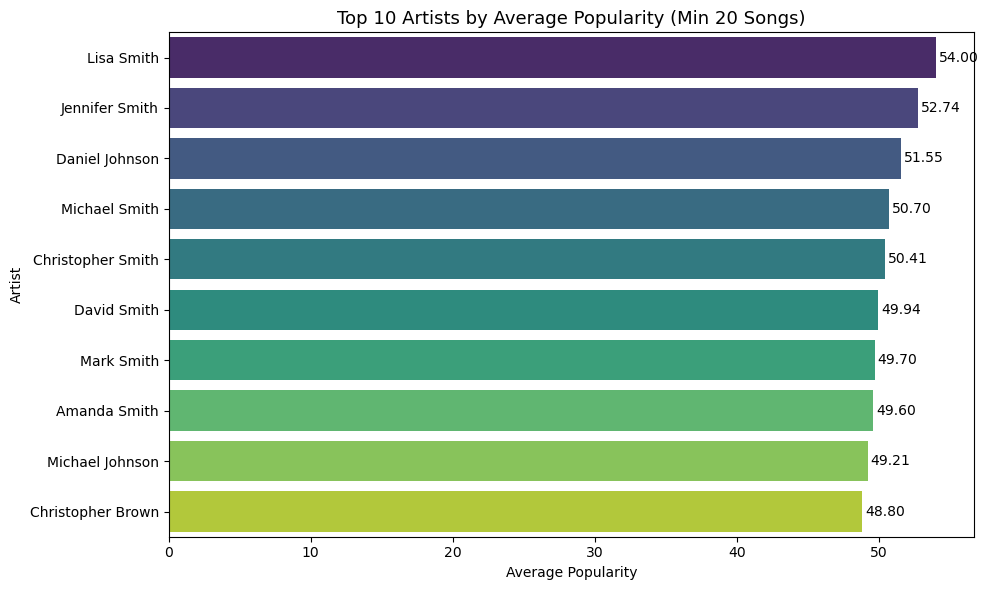

In [55]:
# Plot top 10 artists by average popularity
plt.figure(figsize=(10, 6))

sns.barplot(
    x=top_artists.values,
    y=top_artists.index,
    palette='viridis'
)

# Add value labels
for index, value in enumerate(top_artists.values):
    plt.text(value + 0.2, index, f"{value:.2f}", va='center')

plt.title("Top 10 Artists by Average Popularity (Min 20 Songs)", fontsize=13)
plt.xlabel("Average Popularity")
plt.ylabel("Artist")

plt.tight_layout()
plt.show()

### ***Observation***
***The chart shows that the top artists have very similar average popularity scores, with only slight differences between them.  
This indicates that consistent performance across multiple releases plays a more important role than extreme popularity variations among these artists.***

## ***Audio Features Across Popularity Bands***
***In this section, I grouped songs into three popularity bands (Low, Average, and Hit) using quantiles.  
I then compared the average values of key audio features across these bands to understand whether highly popular songs share common audio characteristics.***

In [56]:
# Create popularity bands using quantiles
df['popularity_band'] = pd.qcut(
    df['popularity'],
    q=3,
    labels=['Low', 'Average', 'Hit']
)

# Check distribution of bands
df['popularity_band'].value_counts()

popularity_band
Low        29469
Average    28795
Hit        26669
Name: count, dtype: int64

In [57]:
# Compare average audio features by popularity band
feature_cols = [
    'danceability', 'energy', 'loudness',
    'instrumentalness', 'tempo'
]

band_feature_means = (
    df.groupby('popularity_band')[feature_cols]
    .mean()
    .round(3)
)

band_feature_means

,danceability,energy,loudness,instrumentalness,tempo
popularity_band,,,,,
Low,0.521,0.505,-28.120,0.399,130.146
Average,0.520,0.506,-27.975,0.400,129.907
Hit,0.521,0.506,-27.884,0.400,129.810


In [58]:
# Prepare data for visualization
band_feature_means_reset = band_feature_means.reset_index()

melted_features = band_feature_means_reset.melt(
    id_vars='popularity_band',
    value_vars=feature_cols,
    var_name='Feature',
    value_name='Average Value'
)

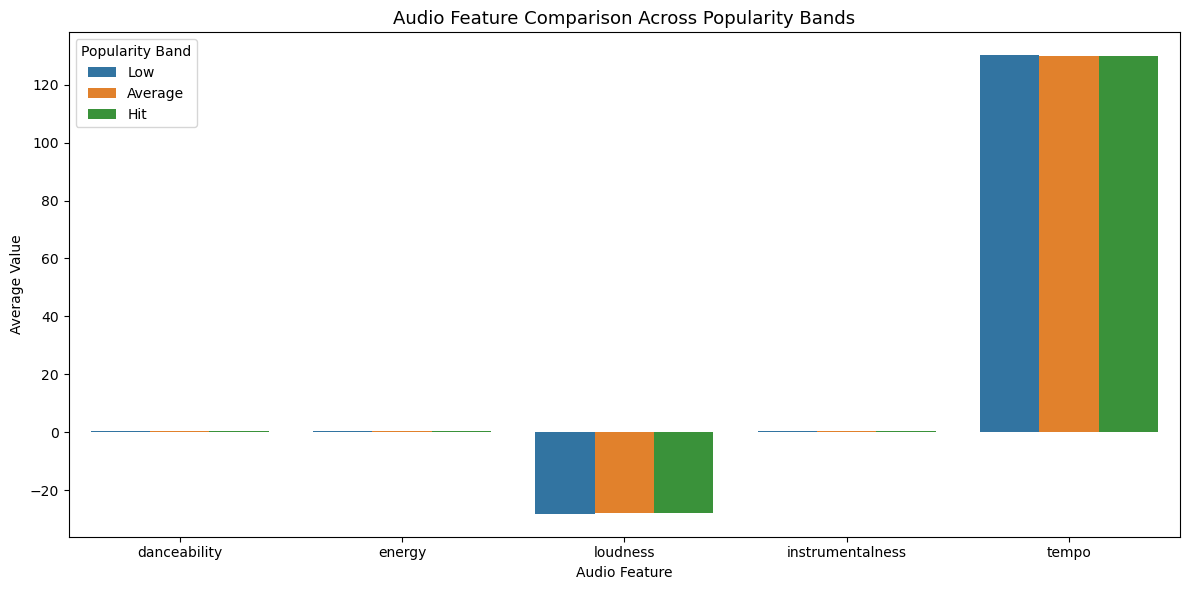

In [59]:
# Plot feature comparison across popularity bands
plt.figure(figsize=(12, 6))

sns.barplot(
    data=melted_features,
    x='Feature',
    y='Average Value',
    hue='popularity_band',
    palette={
        'Low': '#1F77B4',
        'Average': '#FF7F0E',
        'Hit': '#2CA02C'
    }
)

plt.title("Audio Feature Comparison Across Popularity Bands", fontsize=13)
plt.xlabel("Audio Feature")
plt.ylabel("Average Value")
plt.legend(title="Popularity Band")

plt.tight_layout()
plt.show()

### ***Observation***
***The average values of most audio features remain very similar across all popularity bands. Features like danceability, energy, instrumentalness, and tempo show minimal variation between low, average, and hit songs.  
This suggests that popularity on Spotify is not strongly driven by individual audio features alone, but is likely influenced more by external factors such as exposure, promotion, and listener engagement.***

## ***Popularity vs Stream Count (Log Scale)***
***In this section, I analyzed the relationship between stream count and popularity using a logarithmic scale.  
Since stream counts vary widely across songs, applying a log scale helps in visualizing the data more clearly and identifying patterns that are not easily visible on a linear scale.***

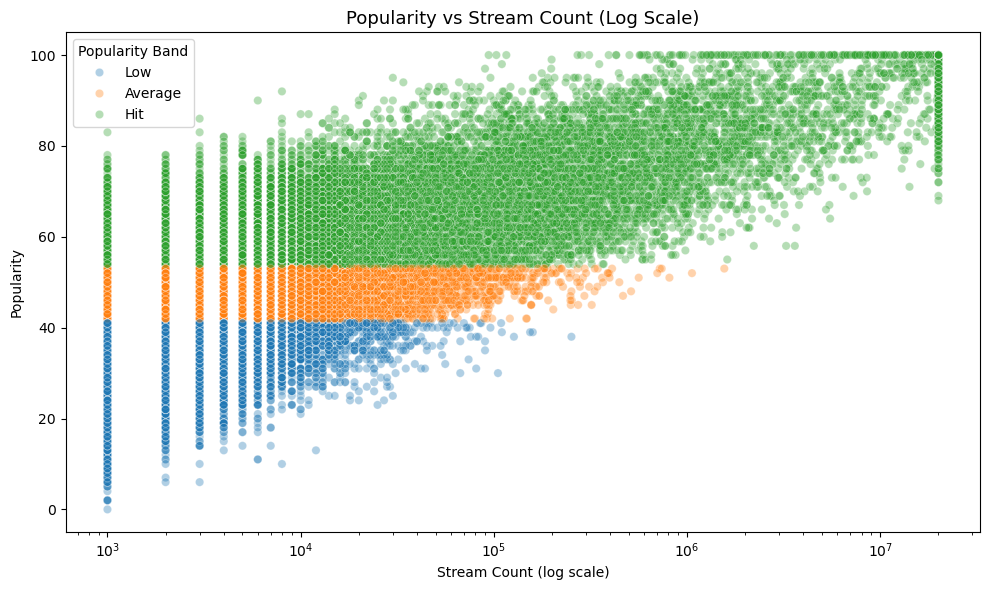

In [60]:
# Scatter plot with log-scaled stream count
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='stream_count',
    y='popularity',
    hue='popularity_band',
    palette={
        'Low': '#1F77B4',
        'Average': '#FF7F0E',
        'Hit': '#2CA02C'
    },
    alpha=0.35
)

plt.xscale('log')  # Log scale for better visibility

plt.title("Popularity vs Stream Count (Log Scale)", fontsize=13)
plt.xlabel("Stream Count (log scale)")
plt.ylabel("Popularity")
plt.legend(title="Popularity Band")

plt.tight_layout()
plt.show()

## ***Popularity Distribution and Blockbuster Songs***
***In this section, I analyzed how songs are distributed across different popularity bands and examined the characteristics of the most streamed songs.  
This helps in understanding whether highly streamed songs tend to fall into specific popularity categories.***

In [50]:
# Identify top 1% most streamed songs
stream_threshold = df['stream_count'].quantile(0.99)

outliers = df[df['stream_count'] >= stream_threshold]

# How many extreme outliers?
outliers.shape

(850, 21)

In [51]:
# Check popularity stats of these blockbusters
outliers['popularity'].describe()

count    850.000000
mean      93.364706
std        7.341810
min       68.000000
25%       88.000000
50%       96.000000
75%      100.000000
max      100.000000
Name: popularity, dtype: float64

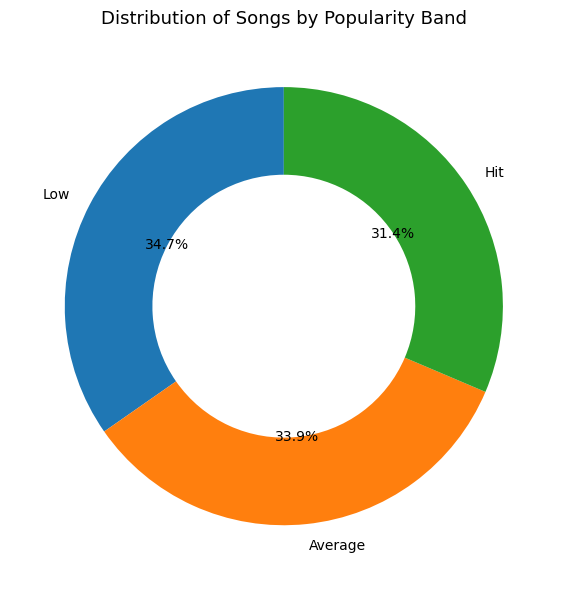

In [61]:
# Count popularity bands
band_counts = df['popularity_band'].value_counts()

# Create donut chart
plt.figure(figsize=(6, 6))

plt.pie(
    band_counts.values,
    labels=band_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1F77B4', '#FF7F0E', '#2CA02C'],
    wedgeprops={'width': 0.4}
)

plt.title("Distribution of Songs by Popularity Band", fontsize=13)
plt.tight_layout()
plt.show()

### ***Observation***
***The distribution of songs across popularity bands is fairly balanced, with no single category dominating the dataset.  
However, when focusing on the top 1% most streamed songs, the majority of them fall into the higher popularity range, indicating that extreme streaming success is strongly associated with high popularity scores.***

## ***Conclusion & Key Takeaways***
- ***The number of songs released on Spotify has remained relatively consistent from 2015 to 2025, with minor year-to-year fluctuations.***
- ***Average song popularity has stayed fairly stable over time, showing no strong upward or downward trend.***
- ***Genre-wise analysis indicates that popularity differences across genres are minimal, suggesting that genre alone does not strongly influence popularity.***
- ***Stream count shows a noticeable positive relationship with popularity, especially when viewed on a logarithmic scale.***
- ***Audio features such as danceability, energy, tempo, and loudness show very weak correlation with popularity.***
- ***Explicit content does not appear to have a significant impact on a song’s popularity.***
- ***Overall, the analysis suggests that popularity on Spotify is driven more by listener engagement and exposure rather than individual audio characteristics.***

### ***Future Scope***
***Further analysis could include regional trends, artist-level growth over time, or predictive modeling to estimate song popularity.***